# XGBoost

ref: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

## What is XGBoost

- XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

- push the limit of computations resources for boosted tree algorithms

![image](./0904.png)

ref: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

## Why XGBoost?

XGBoost is a software library that you can download and install on your machine, then access from a variety of interfaces. Specifically, XGBoost supports the following main interfaces:

- Command Line Interface (CLI).
- C++ (the language in which the library is written).
- Python interface as well as a model in scikit-learn.
- R interface as well as a model in the caret package.
- Julia.
- Java and JVM languages like Scala and platforms like Hadoop.


The algorithm differentiates itself in the following ways:

- A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

- Portability: Runs smoothly on Windows, Linux, and OS X.

- Languages: Supports all major programming languages including C++, Python, R, Java, Scala, and Julia.

- Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.

## sklearn

ref: https://www.datacamp.com/community/tutorials/xgboost-in-python

In [8]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np



X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
# convert the dataset into an optimized data structure called Dmatrix 
# that XGBoost supports and gives it acclaimed performance and efficiency gains

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3,
                          learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[22:09:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 10.397587


In [4]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[22:05:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [5]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680255,0.025604,21.719119,0.019027
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119743,18.109863,0.129374
3,16.463924,0.115088,16.587236,0.182337
4,14.990312,0.112000,15.132977,0.166282


[22:10:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


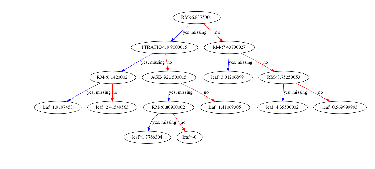

In [18]:

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 50]
plt.show()